### Author:---> Abhishek Kumar
### Project:---> Amazon Kindle Review Sentiment Analysis ML, NLP Project

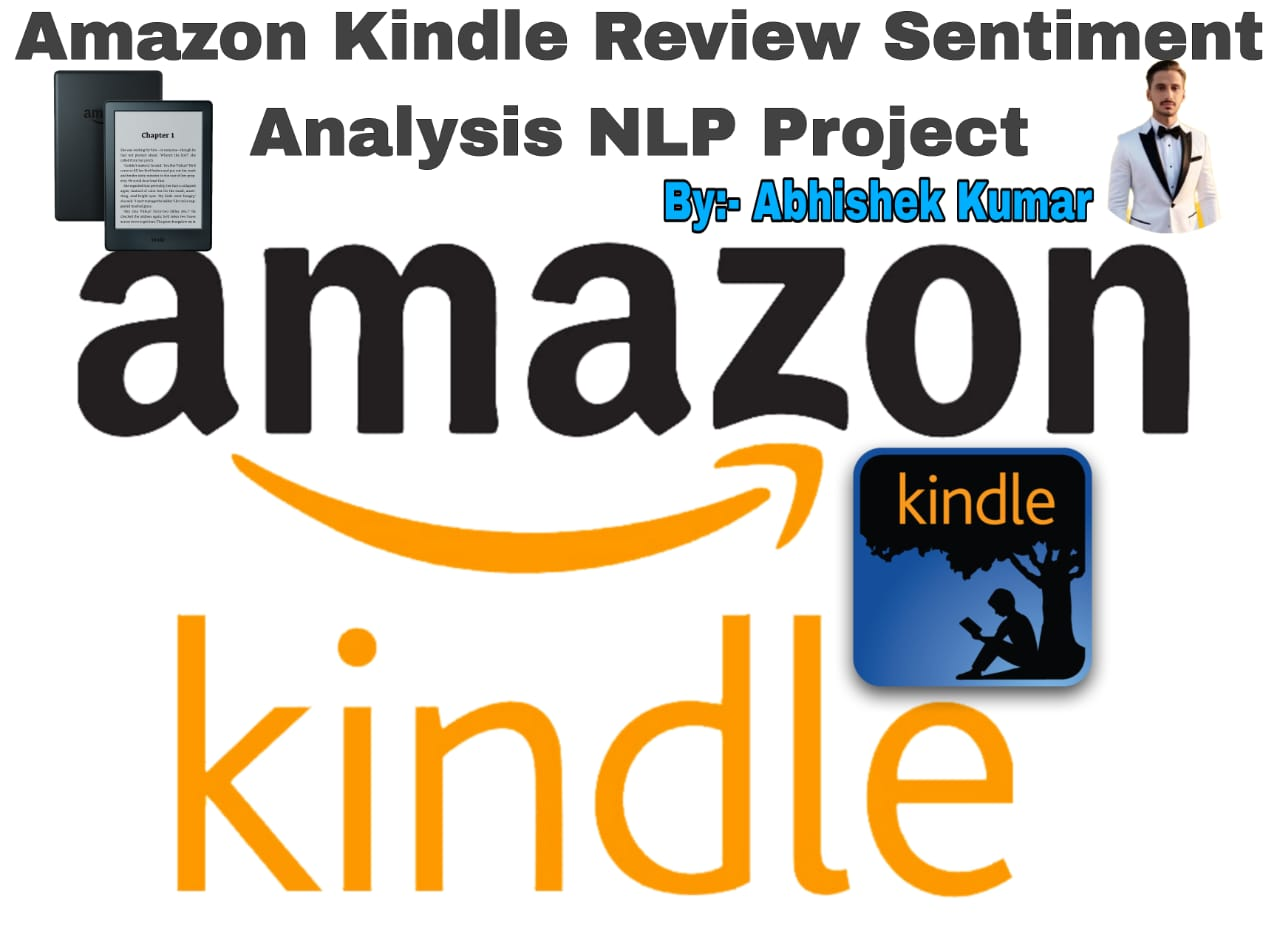

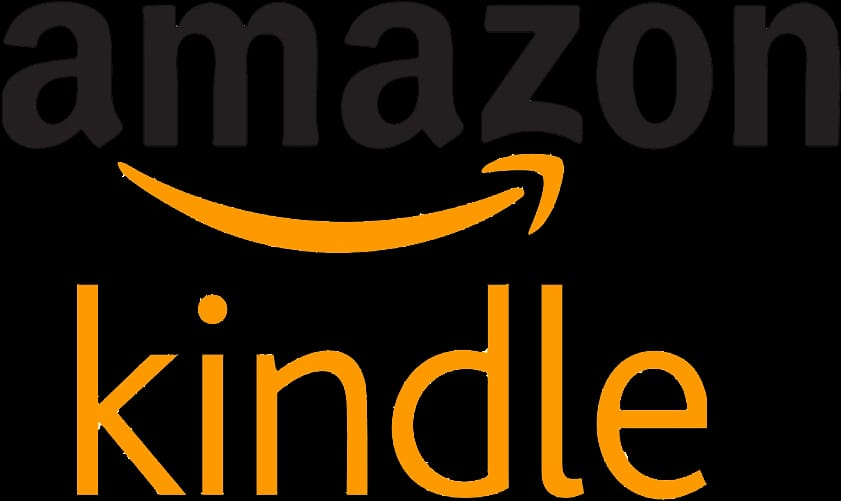

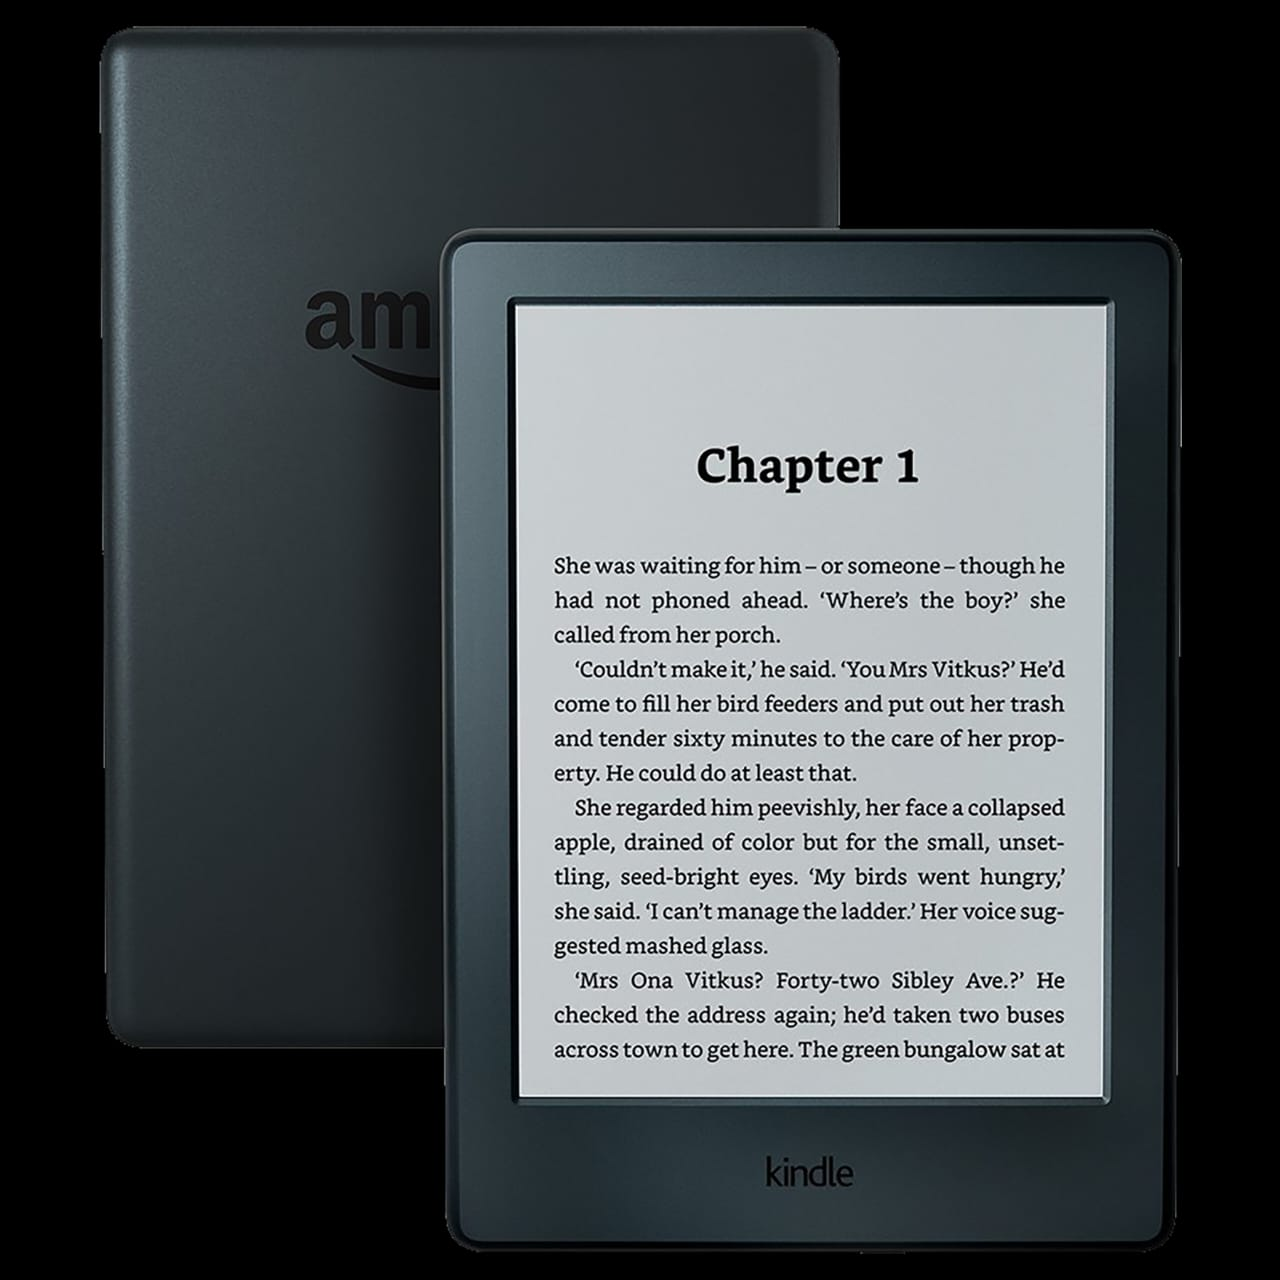

## <b> About Dataset : </b>
Context
This is a small subset of dataset of Book reviews from Amazon Kindle Store category.

Content
5-core dataset of product reviews from Amazon Kindle Store category from May 1996 - July 2014. Contains total of 982619 entries. Each reviewer has at least 5 reviews and each product has at least 5 reviews in this dataset.
Columns

- asin - ID of the product, like B000FA64PK
- helpful - helpfulness rating of the review - example: 2/3.
- overall - rating of the product.
- reviewText - text of the review (heading).
- reviewTime - time of the review (raw).
- reviewerID - ID of the reviewer, like A3SPTOKDG7WBLN
- reviewerName - name of the reviewer.
- summary - summary of the review (description).
- unixReviewTime - unix timestamp.

Acknowledgements
This dataset is taken from Amazon product data, Julian McAuley, UCSD website. http://jmcauley.ucsd.edu/data/amazon/

License to the data files belong to them.

Inspiration
- Sentiment analysis on reviews.
- Understanding how people rate usefulness of a review/ What factors influence helpfulness of a review.
- Fake reviews/ outliers.
- Best rated product IDs, or similarity between products based on reviews alone (not the best idea ikr).
- Any other interesting analysis

### <b> Best Practises
1. Preprocessing And Cleaning - (Feature Engineering )
2. Train Test Split
3. BOW,TFIDF,Word2vec
4. Train ML algorithms

#### Step1:---> Import all the Important Library

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Step2:----> Load the dataset from the all_kindle_review_csv CSV FILE

In [8]:

# Load the dataset
data=pd.read_csv("all_kindle_review .csv")


#### Step3:----> Read the Top 5 Rows of the dataset

In [11]:
data.head()

,Unnamed: 0.1,Unnamed: 0,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000


#### Step4:----> Read the last 5 Rows of dataset

In [14]:
data.tail()

,Unnamed: 0.1,Unnamed: 0,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
11995,11995,2183,B001DUGORO,"[0, 0]",4,Valentine cupid is a vampire- Jena and Ian ano...,"02 28, 2014",A1OKS5Q1HD8WQC,lisa jon jung,jena,1393545600
11996,11996,6272,B002JCSFSQ,"[2, 2]",5,I have read all seven books in this series. Ap...,"05 16, 2011",AQRSPXLNEQAMA,TerryLP,Peacekeepers Series,1305504000
11997,11997,12483,B0035N1V7K,"[0, 1]",3,This book really just wasn't my cuppa. The si...,"07 26, 2013",A2T5QLT5VXOJAK,hwilson,a little creepy,1374796800
11998,11998,3640,B001W1XT40,"[1, 2]",1,"tried to use it to charge my kindle, it didn't...","09 17, 2013",A28MHD2DDY6DXB,"Allison A. Slater ""Gryphon50""",didn't work,1379376000
11999,11999,11398,B003370JUS,"[5, 6]",3,Taking Instruction is a look into the often hi...,"07 5, 2012",A3JUXLB4K9ZXCC,Dafna Yee,"If you like BDSM with a touch of romance, this...",1341446400


#### Step5:----> check the total information of dataset

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    12000 non-null  int64 
 1   Unnamed: 0      12000 non-null  int64 
 2   asin            12000 non-null  object
 3   helpful         12000 non-null  object
 4   rating          12000 non-null  int64 
 5   reviewText      12000 non-null  object
 6   reviewTime      12000 non-null  object
 7   reviewerID      12000 non-null  object
 8   reviewerName    11962 non-null  object
 9   summary         11998 non-null  object
 10  unixReviewTime  12000 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 1.0+ MB


In [19]:
data.info

<bound method DataFrame.info of        Unnamed: 0.1  Unnamed: 0        asin  helpful  rating  \
0                 0       11539  B0033UV8HI  [8, 10]       3   
1                 1        5957  B002HJV4DE   [1, 1]       5   
2                 2        9146  B002ZG96I4   [0, 0]       3   
3                 3        7038  B002QHWOEU   [1, 3]       3   
4                 4        1776  B001A06VJ8   [0, 1]       4   
...             ...         ...         ...      ...     ...   
11995         11995        2183  B001DUGORO   [0, 0]       4   
11996         11996        6272  B002JCSFSQ   [2, 2]       5   
11997         11997       12483  B0035N1V7K   [0, 1]       3   
11998         11998        3640  B001W1XT40   [1, 2]       1   
11999         11999       11398  B003370JUS   [5, 6]       3   

                                              reviewText   reviewTime  \
0      Jace Rankin may be short, but he's nothing to ...   09 2, 2010   
1      Great short read.  I didn't want to put it dow

#### Step6:----> Perform Statitical Analysis of dataset

In [22]:
data.describe()

,Unnamed: 0.1,Unnamed: 0,rating,unixReviewTime
count,12000.00000,12000.000000,12000.000000,1.200000e+04
mean,5999.50000,10024.275667,3.250000,1.344537e+09
std,3464.24595,10502.233123,1.421619,4.369374e+07
min,0.00000,0.000000,1.000000,9.602496e+08
25%,2999.75000,2999.750000,2.000000,1.316218e+09
50%,5999.50000,5999.500000,3.500000,1.356826e+09
75%,8999.25000,12475.750000,4.250000,1.376870e+09
max,11999.00000,47770.000000,5.000000,1.405814e+09


In [24]:
data.size

132000

In [26]:
data.shape

(12000, 11)

In [28]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'asin', 'helpful', 'rating', 'reviewText',
       'reviewTime', 'reviewerID', 'reviewerName', 'summary',
       'unixReviewTime'],
      dtype='object')

In [30]:
data.isnull().sum()

Unnamed: 0.1       0
Unnamed: 0         0
asin               0
helpful            0
rating             0
reviewText         0
reviewTime         0
reviewerID         0
reviewerName      38
summary            2
unixReviewTime     0
dtype: int64

In [32]:
data.dropna().sum()

Unnamed: 0.1                                               71767371
Unnamed: 0                                                119839632
asin              B0033UV8HIB002HJV4DEB002ZG96I4B002QHWOEUB001A0...
helpful           [8, 10][1, 1][0, 0][1, 3][0, 1][6, 6][1, 1][1,...
rating                                                        38870
reviewText        Jace Rankin may be short, but he's nothing to ...
reviewTime        09 2, 201010 8, 201304 11, 201407 5, 201412 31...
reviewerID        A3HHXRELK8BHQGA2RGNZ0TRF578IA3S0H2HV6U1I7FAC4O...
reviewerName      RidleyHolly ButlerMerissaCleargraceRjostlerAub...
summary           Entertaining But AverageTerrific menage scenes...
unixReviewTime                                       16079600822400
dtype: object

In [135]:
data = data[['reviewText', 'rating']]
data

,reviewText,rating
0,"Jace Rankin may be short, but he's nothing to ...",3
1,Great short read. I didn't want to put it dow...,5
2,I'll start by saying this is the first of four...,3
3,Aggie is Angela Lansbury who carries pocketboo...,3
4,I did not expect this type of book to be in li...,4
...,...,...
11995,Valentine cupid is a vampire- Jena and Ian ano...,4
11996,I have read all seven books in this series. Ap...,5
11997,This book really just wasn't my cuppa. The si...,3
11998,"tried to use it to charge my kindle, it didn't...",1


In [136]:
data.shape

(12000, 2)

In [137]:
data.isnull().sum()

reviewText    0
rating        0
dtype: int64

In [138]:
data['rating'].unique()

array([3, 5, 4, 2, 1], dtype=int64)

In [139]:
data['rating'].value_counts()

5    3000
4    3000
3    2000
2    2000
1    2000
Name: rating, dtype: int64

## <b> Data Preprocessing and Cleaning

In [140]:
#Positive Review = 1 , Negative Review = 0
data['rating'] = data['rating'].apply(lambda x:0 if x<3 else 1)

In [141]:
data.head()

,reviewText,rating
0,"Jace Rankin may be short, but he's nothing to ...",1
1,Great short read. I didn't want to put it dow...,1
2,I'll start by saying this is the first of four...,1
3,Aggie is Angela Lansbury who carries pocketboo...,1
4,I did not expect this type of book to be in li...,1


In [142]:
data['rating'].unique()

array([1, 0], dtype=int64)

In [143]:
data['rating'].value_counts()

1    8000
0    4000
Name: rating, dtype: int64

<b> Lower All The Cases :

In [144]:
data['reviewText'] = data['reviewText'].str.lower()

In [145]:
data.head()

,reviewText,rating
0,"jace rankin may be short, but he's nothing to ...",1
1,great short read. i didn't want to put it dow...,1
2,i'll start by saying this is the first of four...,1
3,aggie is angela lansbury who carries pocketboo...,1
4,i did not expect this type of book to be in li...,1


In [146]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [147]:
from nltk.corpus import stopwords

In [148]:
from bs4 import BeautifulSoup

In [149]:
## Removing Special Characters
data['reviewText']=data['reviewText'].apply(lambda x:re.sub('[^a-z A-z 0-9-]+', '',x))
## Remove the stopswords
data['reviewText']=data['reviewText'].apply(lambda x:" ".join([y for y in x.split() if y not in stopwords.words('english')]))
## Remove url 
data['reviewText']=data['reviewText'].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , str(x)))
## Remove html tags
data['reviewText']=data['reviewText'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())
## Remove any additional spaces
data['reviewText']=data['reviewText'].apply(lambda x: " ".join(x.split()))

In [150]:
data.head()

,reviewText,rating
0,jace rankin may short hes nothing mess man hau...,1
1,great short read didnt want put read one sitti...,1
2,ill start saying first four books wasnt expect...,1
3,aggie angela lansbury carries pocketbooks inst...,1
4,expect type book library pleased find price right,1


In [151]:
## lemmatizer
from nltk.stem import WordNetLemmatizer

In [152]:
lemmatizer = WordNetLemmatizer()

In [153]:
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

In [154]:
data['reviewText']=data['reviewText'].apply(lambda x:lemmatize_words(x))

In [155]:
data.head()

,reviewText,rating
0,jace rankin may short he nothing mess man haul...,1
1,great short read didnt want put read one sitti...,1
2,ill start saying first four book wasnt expecti...,1
3,aggie angela lansbury carry pocketbook instead...,1
4,expect type book library pleased find price right,1


## <b> Train Test Split

In [156]:
from sklearn.model_selection import train_test_split

In [157]:
X_train,X_test,y_train,y_test = train_test_split(data['reviewText'],data['rating'],test_size=0.20) 

## BOW - Bag Of Words

In [158]:
from sklearn.feature_extraction.text import CountVectorizer

In [159]:
bow = CountVectorizer()

In [160]:
X_train_bow = bow.fit_transform(X_train).toarray()
X_test_bow = bow.transform(X_test).toarray()

## TF-IDF

In [161]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [162]:
tfidf = TfidfVectorizer()

In [163]:
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf= tfidf.transform(X_test).toarray()

In [164]:
X_train_bow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

#### <b>Implement Naives-Bayes Coz Its Fits Well On Sparse Matrix Dataset

In [165]:
from sklearn.naive_bayes import  GaussianNB

In [166]:
nb_model_bow = GaussianNB().fit(X_train_bow,y_train)

In [167]:
nb_model_tfidf = GaussianNB().fit(X_train_tfidf,y_train)

In [168]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [169]:
y_pred_bow = nb_model_bow.predict(X_test_bow)

In [170]:
y_pred_tfidf = nb_model_tfidf.predict(X_test_tfidf)

In [171]:
print("BOW Accuracy Score : ",accuracy_score(y_test,y_pred_bow))

BOW Accuracy Score :  0.5883333333333334


In [172]:
print(confusion_matrix(y_test,y_pred_bow))

[[541 278]
 [710 871]]


In [173]:
print(classification_report(y_test,y_pred_bow))

              precision    recall  f1-score   support

           0       0.43      0.66      0.52       819
           1       0.76      0.55      0.64      1581

    accuracy                           0.59      2400
   macro avg       0.60      0.61      0.58      2400
weighted avg       0.65      0.59      0.60      2400



In [174]:
print("TF-IDF Accuracy Score : ",accuracy_score(y_test,y_pred_tfidf))

TF-IDF Accuracy Score :  0.5891666666666666


In [175]:
print(confusion_matrix(y_test,y_pred_tfidf))

[[528 291]
 [695 886]]


In [176]:
print(classification_report(y_test,y_pred_tfidf))

              precision    recall  f1-score   support

           0       0.43      0.64      0.52       819
           1       0.75      0.56      0.64      1581

    accuracy                           0.59      2400
   macro avg       0.59      0.60      0.58      2400
weighted avg       0.64      0.59      0.60      2400

